In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

## Ej 1

### a)

In [3]:
def coefs_rl(x, y):
    beta_1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    return beta_1, beta_0

### b)

In [4]:
from gapminder import gapminder

In [5]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [6]:
# Consigo los datos de lifeExp y year de Argentina

datos = gapminder[gapminder["country"] == "Argentina"]
datos = datos[["year", "lifeExp"]]
datos.head()

,year,lifeExp
48,1952,62.485
49,1957,64.399
50,1962,65.142
51,1967,65.634
52,1972,67.065


In [7]:
# Obtengo beta_1 y beta_0

print(coefs_rl(datos["year"], datos["lifeExp"]))

(0.2317083916083916, -389.6063445221445)


In [8]:
# Aca lo hacemos mas piola

modelo = linear_model.LinearRegression()
modelo.fit(datos[["year"]], datos[["lifeExp"]])
beta_1 = modelo.coef_[0][0]
beta_0 = modelo.intercept_[0]
print(beta_1, beta_0)

0.23170839160839155 -389.6063445221444


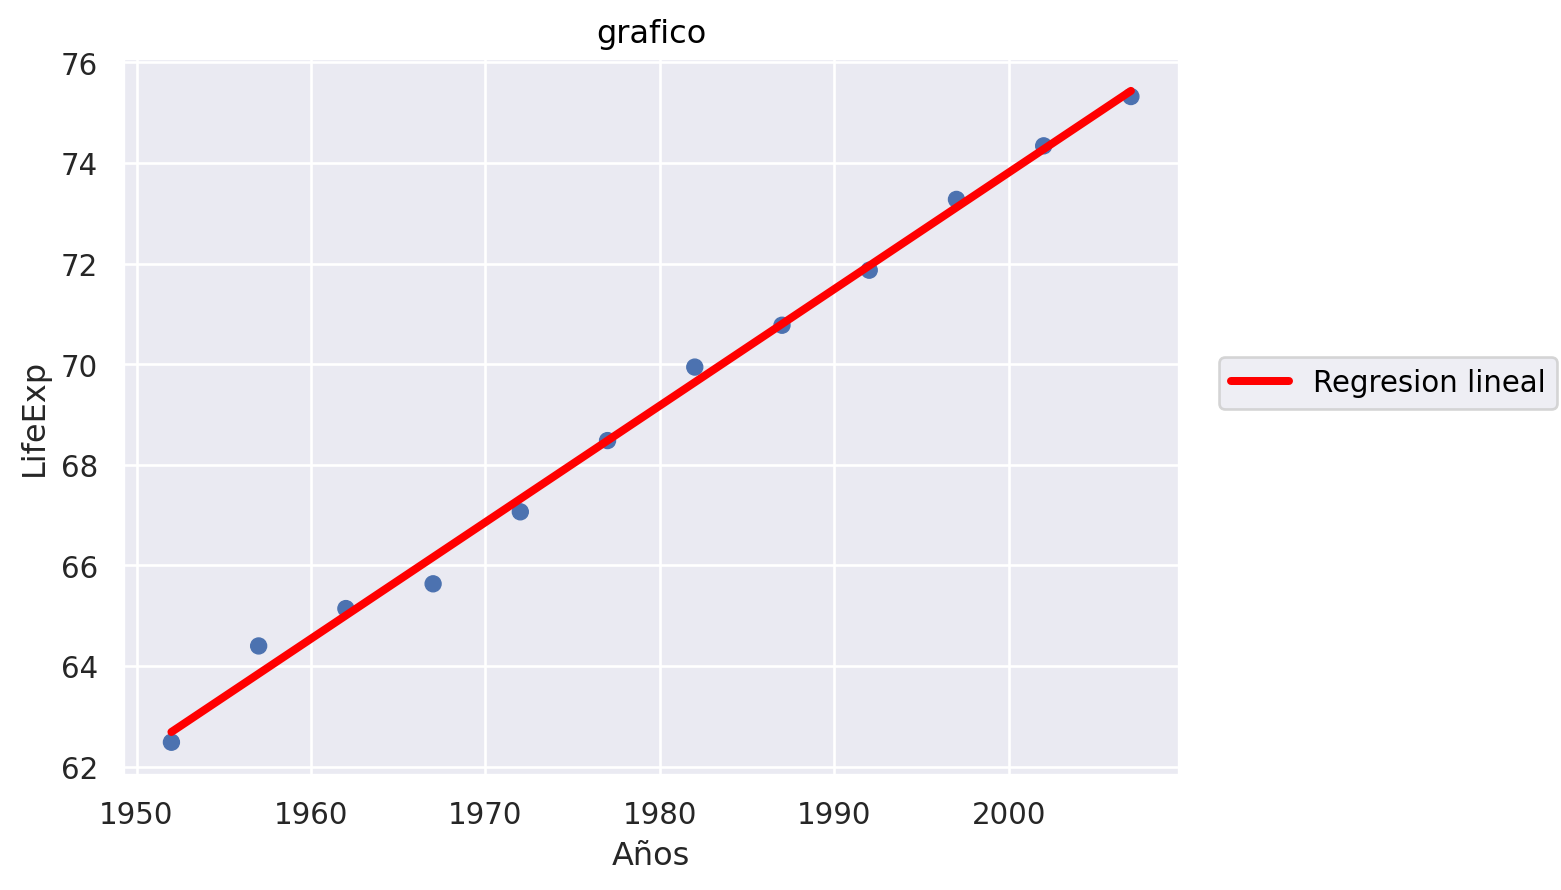

In [9]:
(
    so.Plot(data=datos, x='year', y='lifeExp')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='grafico', x='Años', y='LifeExp')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

## 2

### a)

Realizar un scatterplot que muestre la relacion entre superficie y precio de cada inmueble

In [10]:
inmuebles = pd.read_csv("inmuebles.csv")
inmuebles.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


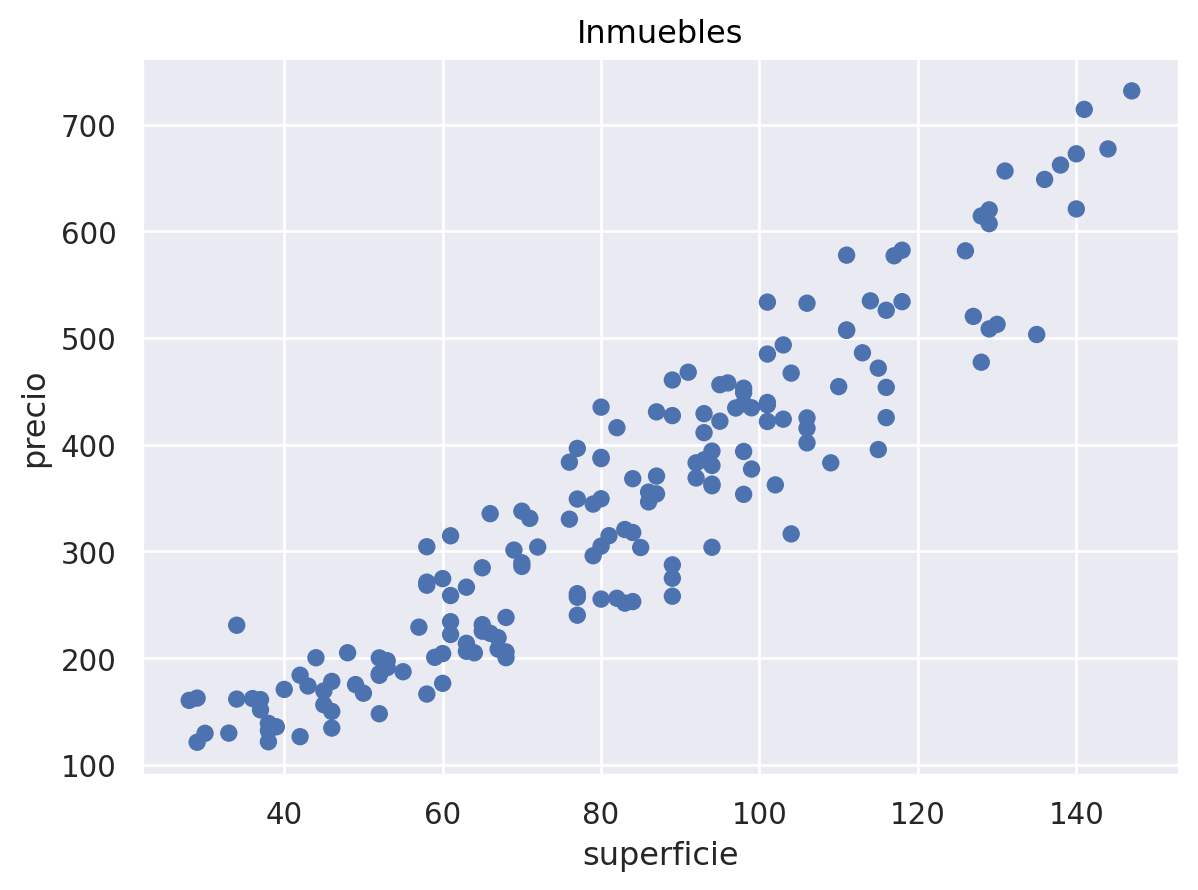

In [11]:
(
    so.Plot(data=inmuebles, x='superficie', y='precio')
    .add(so.Dot())
    .label(title='Inmuebles', x='superficie', y='precio')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

### b)

Realizar grafico de regresion lineal entre ambas variables.

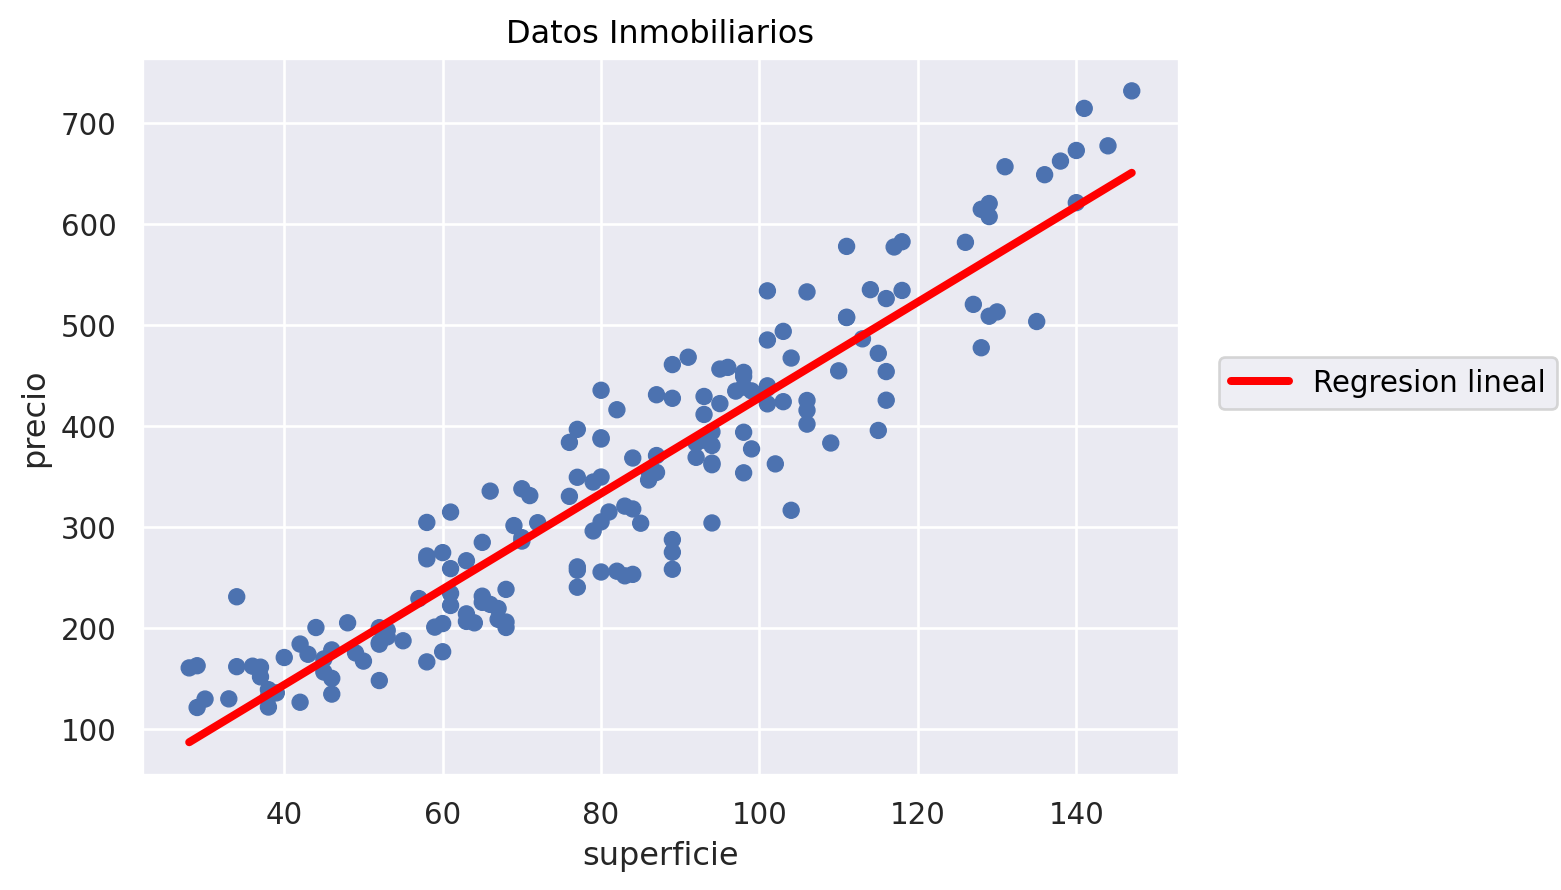

In [12]:
(
    so.Plot(data=inmuebles, x='superficie', y='precio')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='Datos Inmobiliarios', x='superficie', y='precio')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

### c)

In [13]:
coefs = coefs_rl(inmuebles["superficie"], inmuebles["precio"])
print(coefs)

(4.735796822302392, -45.73153403092584)


Podemos ver que el costo de m² es 4,735mil usd

### d) ECM y R²

Por cada metro cuadrado se paga un promedio extra de 4,7 pesos

In [14]:
np.size(inmuebles["precio"])

169

In [15]:
# b_1 = pendiente
# b_0 = origen

def ecm(x, y, pendiente, o_origen):
    y_ideal = (x * pendiente) + o_origen
    n = np.size(x)
    return np.sum((y - y_ideal)**2) / n


def r_cuad(x, y, pendiente, o_origen):
    y_ideal = (x * pendiente) + o_origen
    return np.sum((y_ideal - np.mean(y))**2) / np.sum((y - np.mean(y))**2)

In [16]:
ecm(inmuebles["superficie"], inmuebles["precio"], coefs[0], coefs[1])

2630.9300019446955

In [17]:
modelo2 = linear_model.LinearRegression()
modelo2.fit(inmuebles[["superficie"]], inmuebles[["precio"]])

y_pred = modelo2.predict(inmuebles[["superficie"]])

mean_squared_error(inmuebles[["precio"]], y_pred)

2630.9300019446955

Vemos al comparar que nuestro modelo es identico al de sickitlearn 

### e)

Utilizando las funciones implementadas anteriormente, calcular ecm y R² del ajuste realizado en b)

In [18]:
ecm(inmuebles["superficie"], inmuebles["precio"], coefs[0], coefs[1])

2630.9300019446955

- Es lo que habiamos hecho anteriormente.

- El ecm nos devuelve el promedio de los errores al cuadrado.

- El R² es la Variabilidad explicada / Variabilidad total. Dandonos un porcentaje ( 0 < R² < 1). Cuanto mas cerca de 1, mejor estima nuestra recta. Cuanto mas cerca de 0, peor estima nuestra recta

### f)

Comparar resultados obtenidos con sickitlearn

In [19]:
modelo2 = linear_model.LinearRegression()
modelo2.fit(inmuebles[["superficie"]], inmuebles[["precio"]])

y_pred = modelo2.predict(inmuebles[["superficie"]])

mean_squared_error(inmuebles[["precio"]], y_pred)

2630.9300019446955

Obtenemos los mismos resultados, es decir que nuestra implementacion es correcta.

### g) FALTA LO DE OUTLIERS

Mediante la confeccion de un boxplot, decidir en cual de las zonas hay mayor variabilidad de precios.
¿Hay algun outlier?

<Axes: xlabel='precio'>

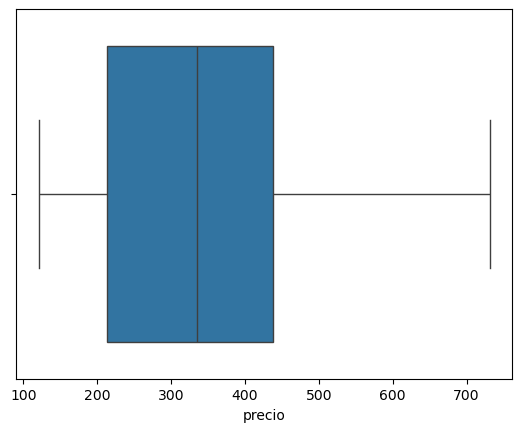

In [20]:
sns.boxplot(inmuebles, x="precio")

veamos cuales son los maximos y minimos precios

In [21]:
print(max(inmuebles["precio"]))
print(min(inmuebles["precio"]))

731.4933733498385
121.23781087529515


    Por lo que vemos, el boxplot empieza en un estimado de 121 y termina en otro estimado de 731.

    Por ende, no hay outliers

### h) BUSCAR COMO HACER TODAS LAS ZONAS JUNTAS 

Para cada una de las zonas de la ciudad, calcular los coeficientes, el ECM y R² de la recta que mejor aproxima a los datos

In [22]:
zona_1 = inmuebles[inmuebles["zona"] == "Zona 1"]
zona_2 = inmuebles[inmuebles["zona"] == "Zona 2"]
zona_3 = inmuebles[inmuebles["zona"] == "Zona 3"]

In [23]:
# ZONA 1

modelo_1 = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo_1.fit(zona_1[['superficie']], zona_1[['precio']])   # Realizamos el ajuste
b1= modelo_1.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
b0= modelo_1.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)

# Para obtener los valores de beta_1 y beta_0 como valores numericos
b1 = modelo_1.coef_[0][0]
b0 = modelo_1.intercept_[0]
print('Beta_1: ', b1)
print('Beta_0: ', b0, "\n")
print()

y_pred_z1 = modelo_1.predict(zona_1[['superficie']])
print("R²: ",r2_score(zona_1[['precio']], y_pred_z1), "\n")
print("ECM: ", mean_squared_error(zona_1[['precio']], y_pred_z1))

Beta_1:  2.442081388302122
Beta_0:  58.852000241172306 


R²:  0.855923919218176 

ECM:  331.22746770470974


In [24]:
# ZONA 2

modelo_2 = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo_2.fit(zona_2[['superficie']], zona_2[['precio']])   # Realizamos el ajuste
b1= modelo_2.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
b0= modelo_2.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)

# Para obtener los valores de beta_1 y beta_0 como valores numericos
b1 = modelo_2.coef_[0][0]
b0 = modelo_2.intercept_[0]
print('Beta_1: ', b1)
print('Beta_0: ', b0, "\n")
print()

y_pred = modelo_2.predict(zona_2[['superficie']])
print("R²: ",r2_score(zona_2[['precio']], y_pred), "\n")
print("ECM: ", mean_squared_error(zona_2[['precio']], y_pred))

Beta_1:  3.206278999112207
Beta_0:  80.73010925558549 


R²:  0.866027281146202 

ECM:  611.4955812522104


In [25]:
# ZONA 3

modelo_3 = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo_3.fit(zona_3[['superficie']], zona_3[['precio']])   # Realizamos el ajuste
b1= modelo_3.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
b0= modelo_3.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)

# Para obtener los valores de beta_1 y beta_0 como valores numericos
b1 = modelo_3.coef_[0][0]
b0 = modelo_3.intercept_[0]
print('Beta_1: ', b1)
print('Beta_0: ', b0, "\n")
print()

y_pred = modelo_3.predict(zona_3[['superficie']])
print("R²: ",r2_score(zona_3[['precio']], y_pred), "\n")
print("ECM: ", mean_squared_error(zona_3[['precio']], y_pred))

Beta_1:  4.560544269538954
Beta_0:  24.966485225784936 


R²:  0.9445652745220188 

ECM:  748.8800907160429


### i)

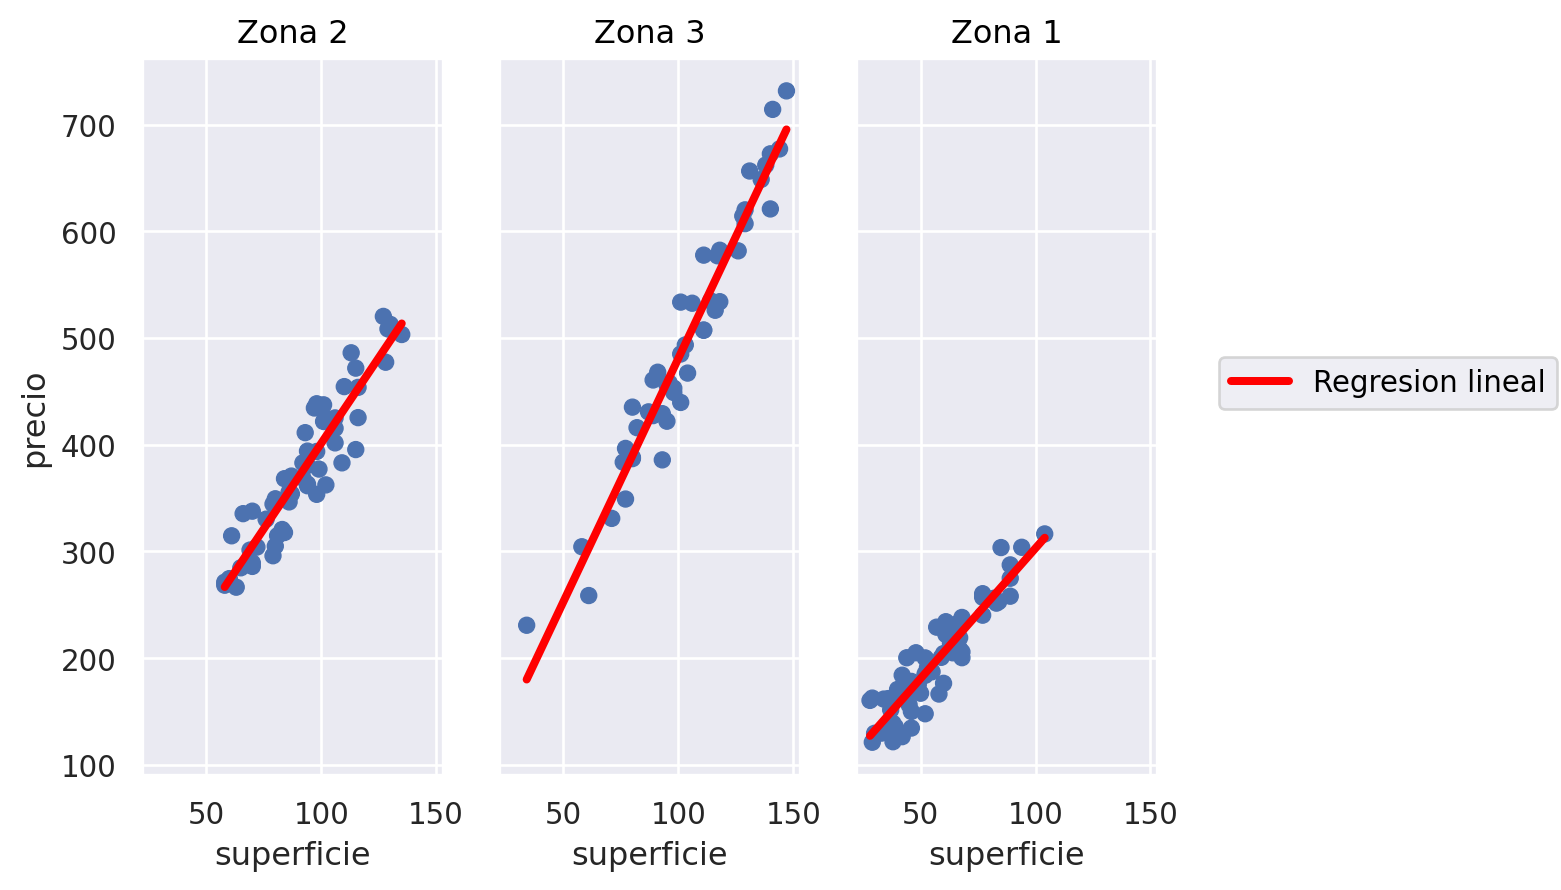

In [26]:
(
    so.Plot(data=inmuebles, x='superficie', y='precio', group = "zona")
    .add(so.Dot(), group = "zona")
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')
    .facet("zona", wrap = 3)
    
)

Obtenido en g):
- zona 1:
  
      - Beta_1:  2.442081388302122
      - Beta_0:  58.852000241172306
  


- zona 2:
  
      - Beta_1:  3.206278999112207
      - Beta_0:  80.73010925558549
  


- zona 3:
  
      - Beta_1:  4.560544269538954
      - Beta_0:  24.966485225784936
  



-----

- Podemos concluir que obtuvimos un GIGANTE error en la estimacion, y que podemos verlo con estos nuevos valores por m² (que son muchisimo menores)

### j)


Queremos poner a la venta un inmueble de 105m². 

- ¿Cual seria el precio de referencia para la venta?
- Si sabemos que ademas el inmueble esta en la Zona 2, ¿Cambiaria en algo el valor calculado anteriormente?


---
Recordemos cuanto valian Beta_1 y Beta_0

In [27]:
coefs = coefs_rl(inmuebles["superficie"], inmuebles["precio"])
print("Beta_1: ",coefs[0], "\n")
print("Beta_0: ",coefs[1], "\n")

Beta_1:  4.735796822302392 

Beta_0:  -45.73153403092584 



Esto significa que podemos construir la ecuacion de la recta de regresion lineal:
- f(x) = Beta_1 * x + Beta_0

Entonces f(x) = 4.735796822302392 * x - 45.73153403092584

Si reemplazamos x = 105m², obtenemos:

In [28]:
4.735796822302392 * 105 - 45.73153403092584

451.5271323108253

Es decir que esperamos que un inmueble de tamaño 102m² cueste alrededor de 451 usd (no se si en miles o no)

---
Pero, ¿Que pasaria si el inmueble pertenece a la Zona 2?

Recordemos que anteriormente obtuvimos, para la Zona 2:

- Beta_1:  3.206278999112207
- Beta_0:  80.73010925558549

  Es decir que nuestra nueva recta de cuadrados minimos lineales seria:

  f(x) = 3.206278999112207 * x + 80.73010925558549

  Con lo que reemplazando x = 105m² obtenemos:

In [29]:
 y = 3.206278999112207 * 105 - 80.73010925558549
print(y)

255.92918565119624


Es decir que en vez de 451 usd, estariamos pagando 255.9 usd en promedio por este inmueble

### k)

Si me ofrecen un inmueble en la Zona 2 a un precio de 300usd:
- ¿Que tan barato o caro es respecto a su precio de referencia?

---

Recordemos el grafico de la Zona 2

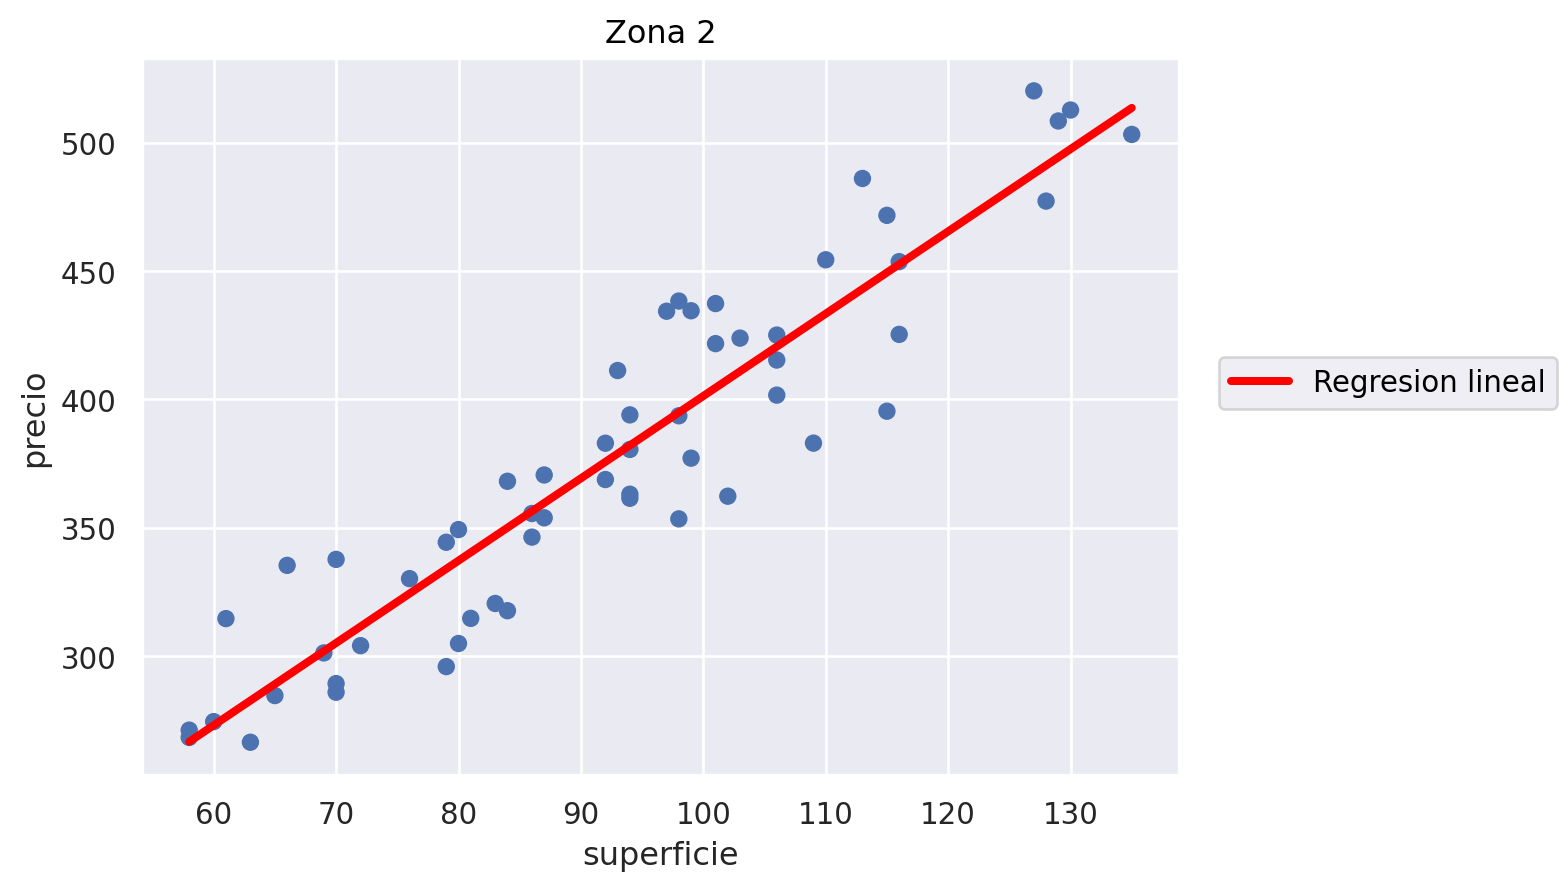

In [30]:
(
    so.Plot(data=zona_2, x='superficie', y='precio')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='Zona 2', x='superficie', y='precio')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

Veamos cuanto vale en promedio para esta zona:
- f(x) = y = 3.206278999112207 * x + 80.73010925558549

Entonces:

- x = (y - 80.73010925558549) / 3.206278999112207

  Reemplazamos y = 300usd

In [31]:
x = (300 - 80.73010925558549) / 3.206278999112207
print(x)

68.38765148171092


Obtenemos que con 300usd podemos conseguir un inmueble de 68m² para la Zona 2.

---
Ahora comparemos con su valor en el estimado general para todas las Zonas.

Recordemos los valores de Beta_1 y Beta_0 para inmuebles:

In [32]:
coefs = coefs_rl(inmuebles["superficie"], inmuebles["precio"])
print("Beta 1: ",coefs[0])
print("Beta 0: ",coefs[1])

Beta 1:  4.735796822302392
Beta 0:  -45.73153403092584


Entonces:
- f(x) = y = 4.735796822302392 * x - 45.73153403092584

Despejando x:
- x = (y - 45.73153403092584) / 4.735796822302392

In [33]:
x = (300 - 45.73153403092584) / 4.735796822302392
print(x)

53.69074635373757


Obtenemos que con 300 usd podemos conseguir un inmueble de 53 m².

Es decir, que es algo menor a lo que obtuvimos en Zona 2.

Entonces lo obtenido en Zona 2 es mas barato que su precio de referencia

### l) Inmuebles.outliers

- Realizar un boxplot que permita identificar en que zona/s se encuentran los outliers
- Comparar los coeficientes del ajuste lineal de la/s zona/s afectada/s con los obtenidos en el item h)

In [34]:
inmuebles_outliers = pd.read_csv("inmuebles_outliers.csv")
inmuebles_outliers.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


Construyamos un Boxplot que nos permita visualizar los outliers

<Axes: xlabel='precio'>

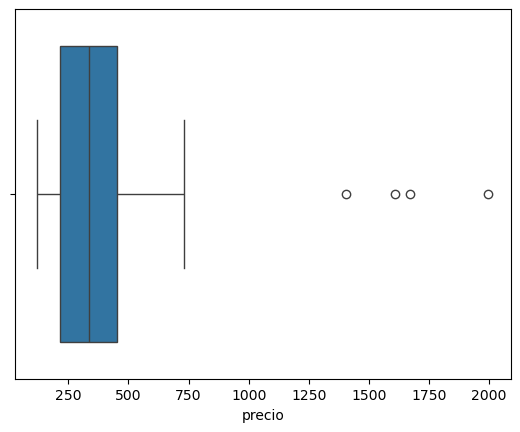

In [35]:
sns.boxplot(inmuebles_outliers, x="precio")

Ahora generemos los coeficientes de ajuste lineal de este nuevo .csv

In [36]:
zona_1_outliers = inmuebles_outliers[inmuebles_outliers["zona"] == "Zona 1"]
zona_2_outliers = inmuebles_outliers[inmuebles_outliers["zona"] == "Zona 2"]
zona_3_outliers = inmuebles_outliers[inmuebles_outliers["zona"] == "Zona 3"]

In [37]:
# ZONA 1 NUEVO CSV

modelo_1 = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo_1.fit(zona_1_outliers[['superficie']], zona_1_outliers[['precio']])   # Realizamos el ajuste
b1= modelo_1.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
b0= modelo_1.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)

# Para obtener los valores de beta_1 y beta_0 como valores numericos
b1 = modelo_1.coef_[0][0]
b0 = modelo_1.intercept_[0]
print('Beta_1: ', b1)
print('Beta_0: ', b0, "\n")
print()

y_pred_z1 = modelo_1.predict(zona_1_outliers[['superficie']])
print("R²: ",r2_score(zona_1_outliers[['precio']], y_pred_z1), "\n")
print("ECM: ", mean_squared_error(zona_1_outliers[['precio']], y_pred_z1))

Beta_1:  2.4420813883021224
Beta_0:  58.85200024117228 


R²:  0.855923919218176 

ECM:  331.22746770470974


In [38]:
# ZONA 2 NUEVO CSV

modelo_1 = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo_1.fit(zona_2_outliers[['superficie']], zona_2_outliers[['precio']])   # Realizamos el ajuste
b1= modelo_1.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
b0= modelo_1.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)

# Para obtener los valores de beta_1 y beta_0 como valores numericos
b1 = modelo_1.coef_[0][0]
b0 = modelo_1.intercept_[0]
print('Beta_1: ', b1)
print('Beta_0: ', b0, "\n")
print()

y_pred_z1 = modelo_1.predict(zona_2_outliers[['superficie']])
print("R²: ",r2_score(zona_2_outliers[['precio']], y_pred_z1), "\n")
print("ECM: ", mean_squared_error(zona_2_outliers[['precio']], y_pred_z1))

Beta_1:  4.266539806966733
Beta_0:  72.89381076100454 


R²:  0.059940627284871595 

ECM:  109771.98270882251


In [39]:
# ZONA 3 NUEVO CSV

modelo_1 = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo_1.fit(zona_3_outliers[['superficie']], zona_3_outliers[['precio']])   # Realizamos el ajuste
b1= modelo_1.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
b0= modelo_1.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)

# Para obtener los valores de beta_1 y beta_0 como valores numericos
b1 = modelo_1.coef_[0][0]
b0 = modelo_1.intercept_[0]
print('Beta_1: ', b1)
print('Beta_0: ', b0, "\n")
print()

y_pred_z1 = modelo_1.predict(zona_3_outliers[['superficie']])
print("R²: ",r2_score(zona_3_outliers[['precio']], y_pred_z1), "\n")
print("ECM: ", mean_squared_error(zona_3_outliers[['precio']], y_pred_z1))

Beta_1:  4.560544269538954
Beta_0:  24.966485225784936 


R²:  0.9445652745220188 

ECM:  748.8800907160429


---

Nuestros nuevos valores son:


Zona 1:
- Beta_1:  2.4420813883021224
- Beta_0:  58.85200024117228 
- R²:  0.855923919218176 
- ECM:  331.22746770470974


Zona 2:
- Beta_1:  4.266539806966733
- Beta_0:  72.89381076100454 
- R²:  0.059940627284871595 
- ECM:  109771.98270882251


Zona 3:
- Beta_1:  4.560544269538954
- Beta_0:  24.966485225784936 
- R²:  0.9445652745220188 
- ECM:  748.8800907160429

---

Comparandolas con las obtenidas en inmuebles.csv:

zona 1:

- Beta_1:  2.442081388302122
- Beta_0:  58.852000241172306
- R²:  0.855923919218176 
- ECM:  331.22746770470974


zona 2:
  
- Beta_1:  3.206278999112207
- Beta_0:  80.73010925558549
- R²:  0.866027281146202 
- ECM:  611.4955812522104

zona 3:
  
- Beta_1:  4.560544269538954
- Beta_0:  24.966485225784936
- R²:  0.9445652745220188 
- ECM:  748.8800907160429

Vemos que Zona 1 y Zona 3 quedan identicas, y que estos outliers solo afectan a Zona 2. 

Con lo que podemos suponer que los outliers solamente aparecen en esta ultima Zona.

Ademas, al tener outliers, se nos modifica la recta predictora y se exageran el ECM obtenido. Por suerte podemos anticipar este error viendo que el R² nos da un numero bajisimo (R² = 0.059940627284871595).

## Ej 3 PROBLEMA CON EJE X, se enciman las fechas

Visualizar el ajuste lineal para los datos de btc_2021 (bitcoin.csv).

En este caso:
- ¿Resulta mas conveniente un scatterplot o un grafico de lineas para los datos?
- ¿Te resultaria util utilizar esta recta para predecir el valor de BTC o para describir el cambio de su valor en este periodo?

In [40]:
# Cargamos los datos
btc = pd.read_csv("bitcoin.csv")
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Vamos a graficar el precio con que abrio Bitcoin en 2023. 

Esto nos va a permitir saber su tendencia.

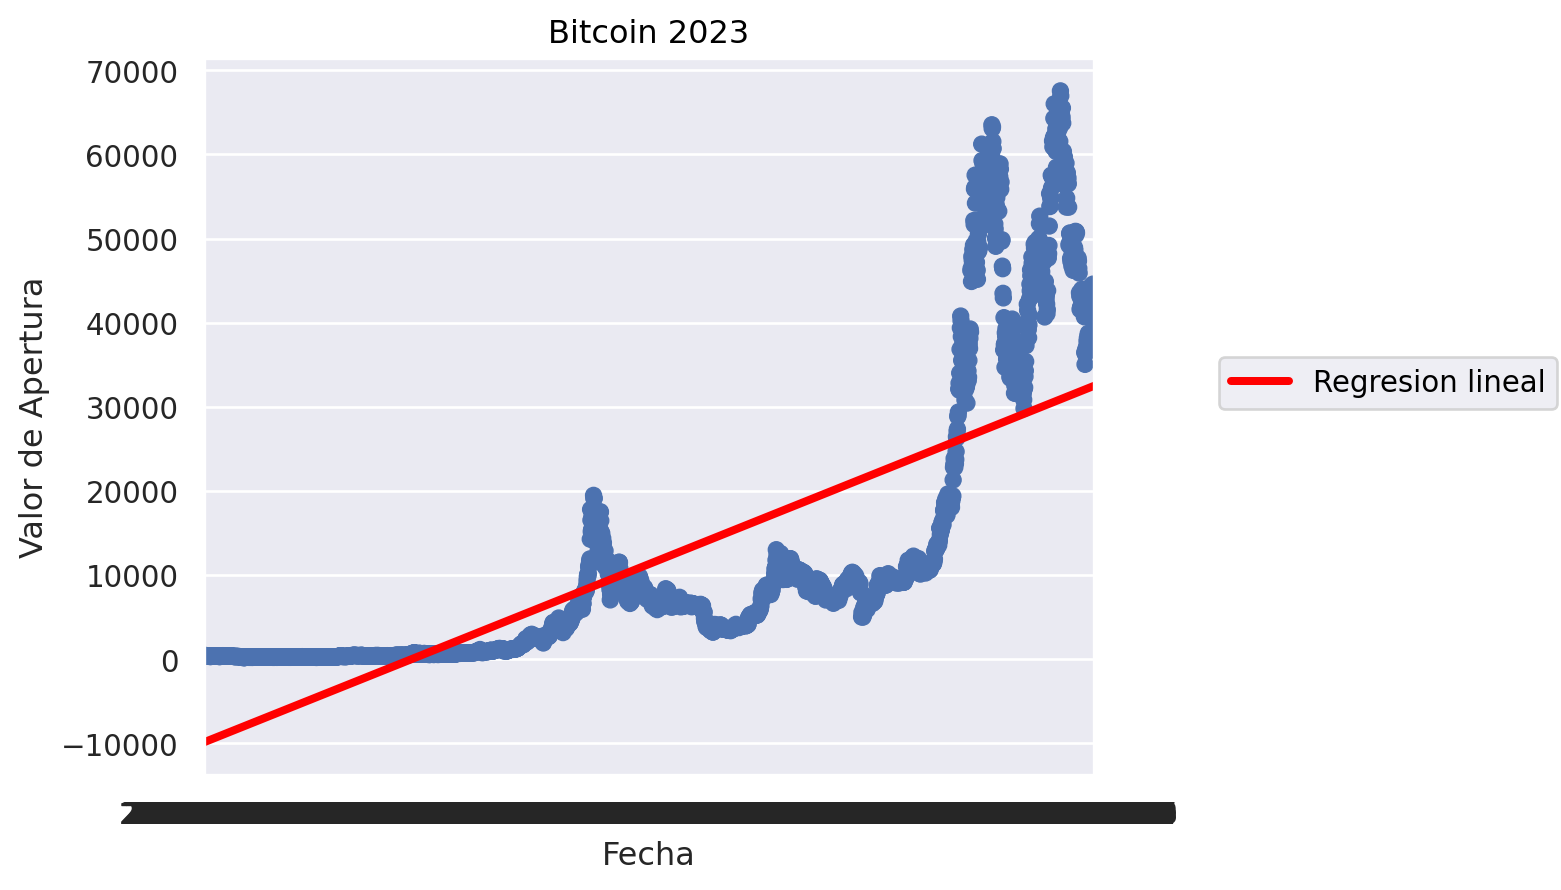

In [41]:
(
    so.Plot(data=btc, x='Date', y='Open')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='Bitcoin 2023', x = "Fecha", y = "Valor de Apertura")    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

Vemos que el scatterplot me queda bastante feo, generemos un grafico de lineas:

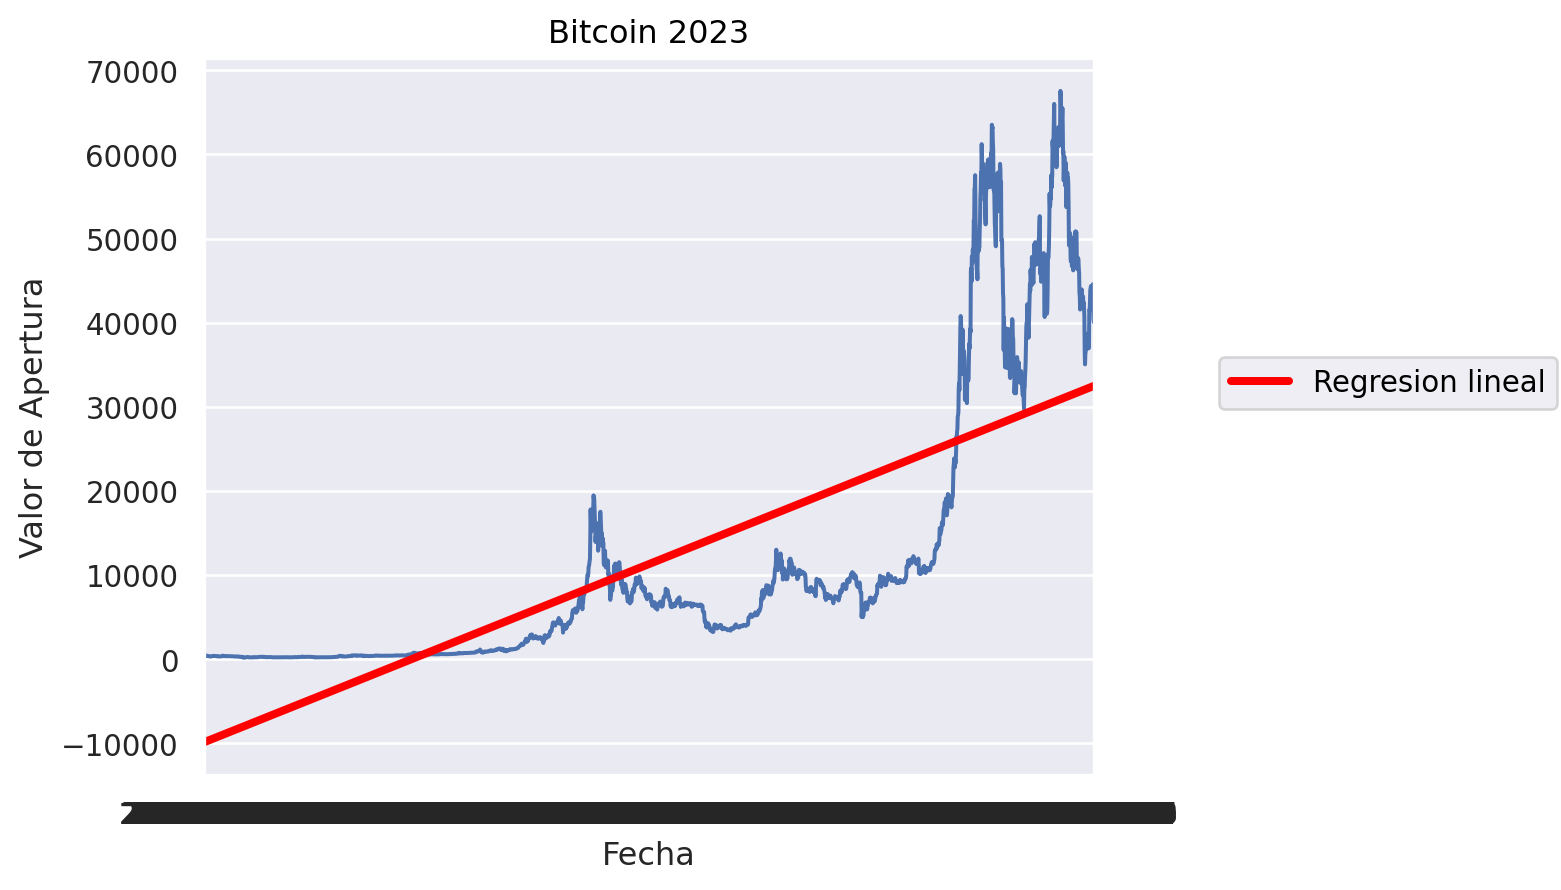

In [42]:
(
    so.Plot(data=btc, x='Date', y='Open')
    .add(so.Line())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='Bitcoin 2023', x = "Fecha", y = "Valor de Apertura")    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

Vemos que el movimiento que hace el bitcoin a lo largo del tiempo no tiene una forma parecida a una recta, sino mas bien a una curva.

Por ende, si generaramos una regresion lineal, lo mas probable es que obtengamos un error muy grande de estimacion.

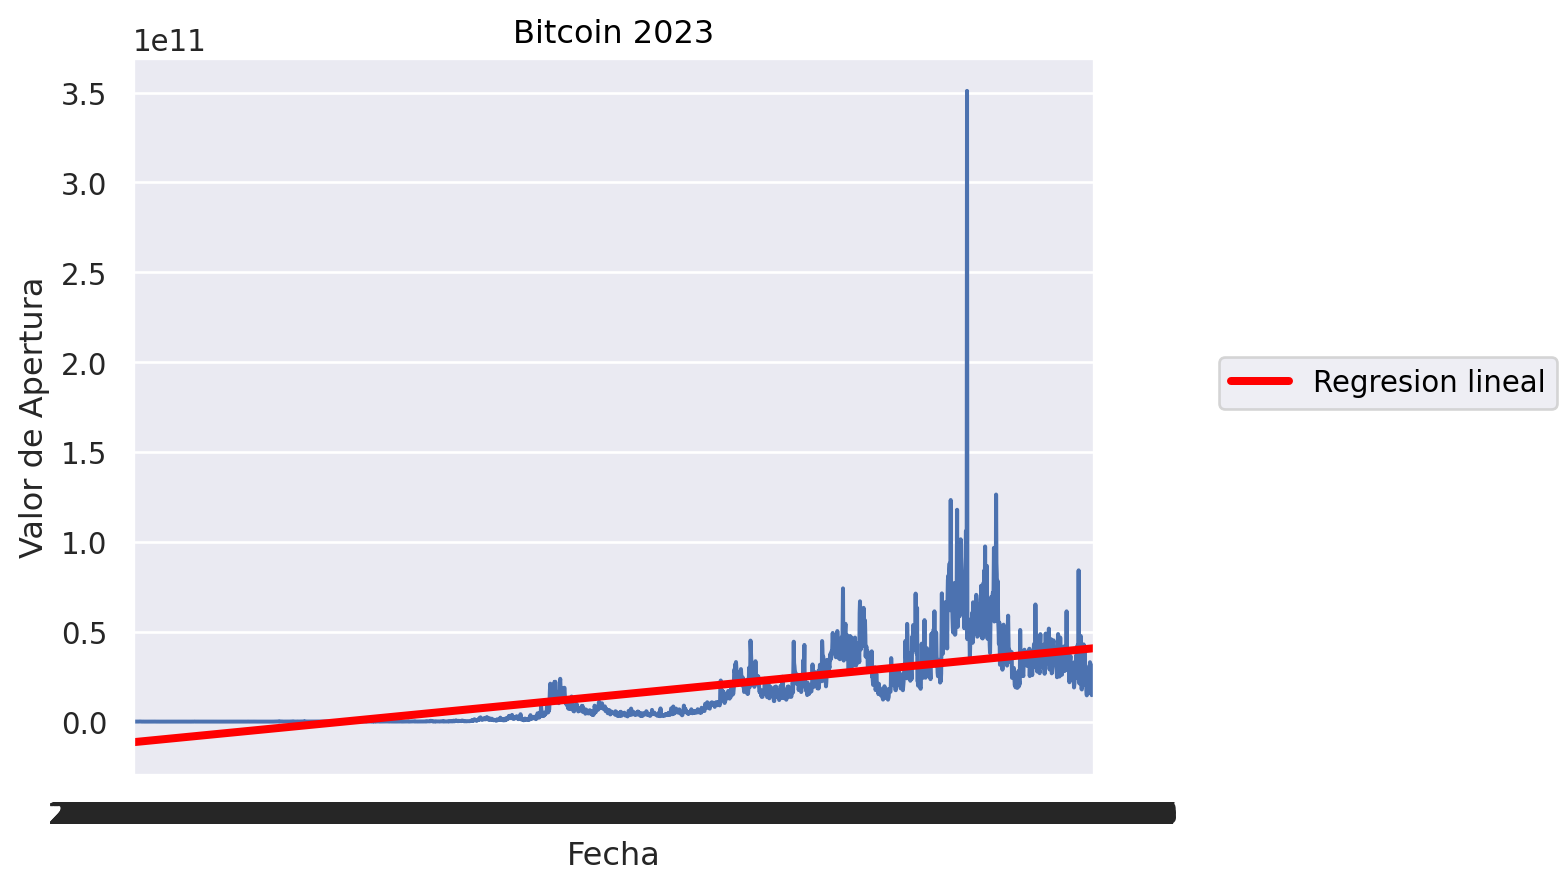

In [43]:
(
    so.Plot(data = btc, x='Date', y='Volume')
    .add(so.Line())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='Bitcoin 2023', x = "Fecha", y = "Valor de Apertura")    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

In [44]:
(
    so.Plot(data = btc, x='Date', y='Close')
    .add(so.Line(color="blue"), label = "Close")
    .add(so.Line(color="black"), so.Agg(), y = "Open", label = "Open")
    .add(so.Line(color="green"), so.Agg(), y = "High", label = "High")
    .add(so.Line(color="red"), so.Agg(), y = "Low", label = "Low")
    .add(so.Line(color="purple"), so.Agg(), y = "Adj Close", label = "Adj Close")
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')
    .label(title='Bitcoin 2023', x = "Fecha", y = "Valores")    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
    .facet("Date" , wrap = 3)
)

KeyboardInterrupt: 

Lo unico que podriamos estimar con al menos un poco de probabilidad y algun que otro outlier seria el Volumen del bitcoin intercambiado.